In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from skimage.segmentation import clear_border
img = cv.imread('matricula_4.jpeg')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

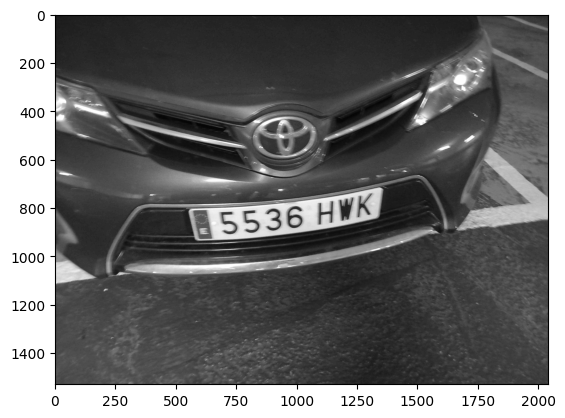

In [2]:
plt.imshow(img_gris,cmap="gray")

In [3]:
kernel = np.ones((3,3), np.uint8)

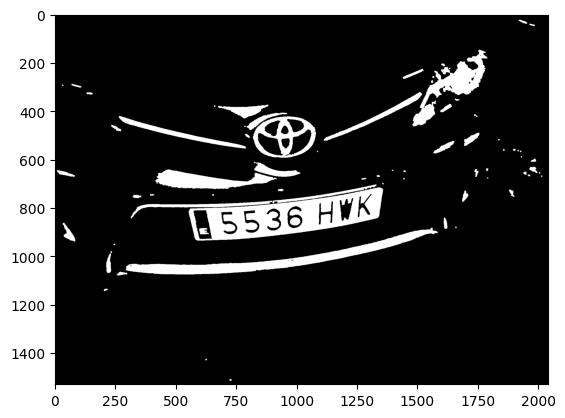

In [4]:
median = cv.medianBlur(img_gris, 3)
ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
kernel = np.ones((5,5), np.uint8)
opening = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)
edge_touching_removed = clear_border(opening)
contours, hierarchy = cv.findContours(edge_touching_removed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
plt.imshow(edge_touching_removed, cmap="gray")



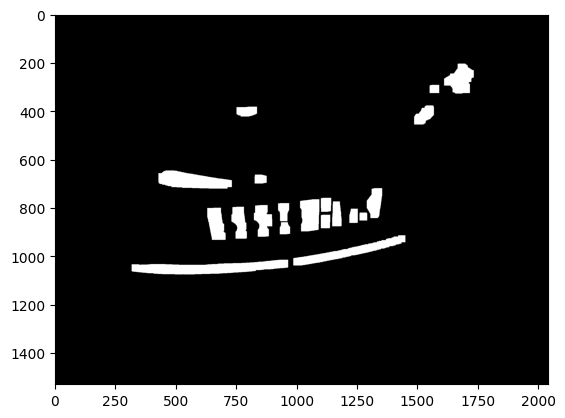

In [5]:
img_erosion = cv.erode(edge_touching_removed, kernel, iterations=7)
img_dilation = cv.dilate(img_erosion, kernel, iterations=7)
plt.imshow(img_dilation, cmap="gray")

In [12]:
cnts,_=cv.findContours(cv.Canny(edge_touching_removed,100,200),cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
contornos =  cv.drawContours((edge_touching_removed//255),cnts,-1,(100,100,100),2)

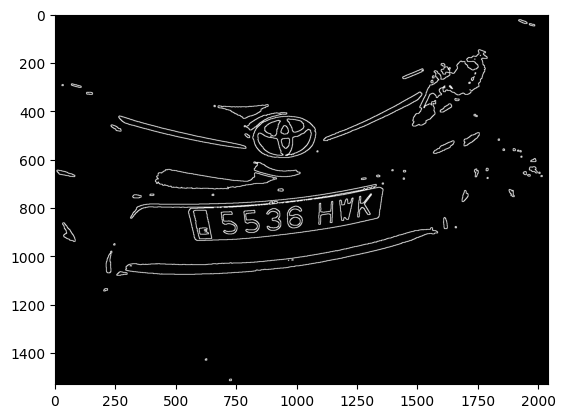

In [13]:
plt.imshow(contornos, cmap="gray")

In [86]:
contornos=[]
for c in cnts:
    area = cv.contourArea(c)
    #x,y,w,h = cv.boundingRect(c)
    epsilon = 0.09*cv.arcLength(c,True)
    approx = cv.approxPolyDP(c,epsilon,True)
    if area>1000 and area<6000:#len(approx)==4 and area>4000:
        print('area=',area)
        contornos.append(c)

area= 1626.5
area= 1669.0
area= 1129.0
area= 1149.0
area= 1843.5
area= 1880.0
area= 1891.5
area= 1920.0
area= 1765.5
area= 1829.5
area= 3446.5
area= 3492.0
area= 1588.5
area= 1600.0
area= 2909.5
area= 2919.5
area= 1480.0
area= 1553.0
area= 1544.0
area= 1562.5
area= 1081.0
area= 1098.5
area= 1493.5
area= 1535.5
area= 2468.0
area= 2497.0
area= 2390.5
area= 2418.5
area= 2759.0
area= 2811.5
area= 5206.0
area= 5237.5


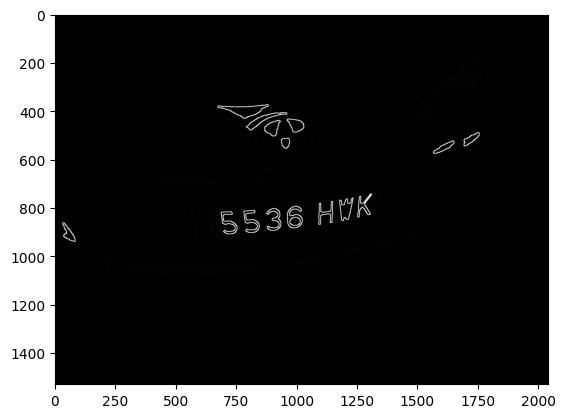

In [87]:
aux=cv.drawContours(edge_touching_removed//255,contornos,-1,(100,100,100),2)
plt.imshow(aux, cmap="gray")

Aqui se sigue con la idea que tenia el profe para casos mas complicados

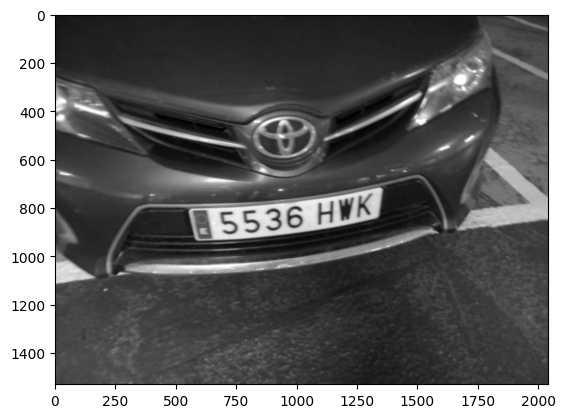

In [8]:
img_gau = cv.GaussianBlur(img_gris, (13,13),0)
plt.imshow(img_gau, cmap="gray")

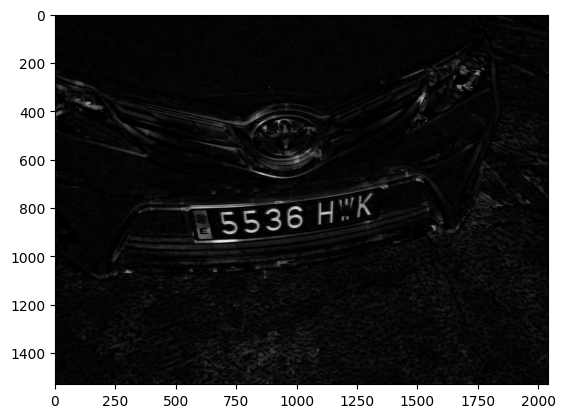

In [9]:
kernel=np.ones((3,3),np.uint8)
top_hat=cv.morphologyEx(img_gris,cv.MORPH_BLACKHAT,kernel,iterations=10)
plt.imshow(top_hat, cmap="gray")